In [1]:
# Install necessary libraries
!pip install pandas scikit-learn

In [30]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB, ComplementNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

In [3]:
# Download NLTK resources
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
# Load the dataset from Google Drive
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:

# Specify the path to the dataset on your Google Drive
dataset_path = '/content/drive/MyDrive/MSDS/ML/Sentiment Analysis/Naive bayes/kaggle airline tweets data set/Tweets.csv'

In [6]:
# Load the dataset into a pandas DataFrame
df = pd.read_csv(dataset_path)


In [7]:
# Display the first few rows of the dataset
df.head()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [8]:
# Text preprocessing
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

In [9]:
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove '@' and '#' symbols
    text = re.sub(r'[@#]', '', text)

    # Convert to lowercase
    text = text.lower()

    # Remove stop words
    text = ' '.join([word for word in text.split() if word not in stop_words])

    # Apply stemming
    text = ' '.join([ps.stem(word) for word in text.split()])

    return text


In [10]:

# Apply preprocessing to the 'text' column
df['text'] = df['text'].apply(preprocess_text)

In [11]:
# Preprocess the data
# For simplicity, we'll use only the 'text' column for sentiment analysis
X = df['text']
y = df['airline_sentiment']

In [16]:
X

0                             virginamerica dhepburn said.
1        virginamerica plu ad commerci experience... ta...
2        virginamerica today... must mean need take ano...
3        virginamerica realli aggress blast obnoxi "ent...
4                       virginamerica realli big bad thing
                               ...                        
14635         americanair thank got differ flight chicago.
14636    americanair leav 20 minut late flight. warn co...
14637    americanair pleas bring american airlin blackb...
14638    americanair money, chang flight, answer phones...
14639    americanair 8 ppl need 2 know mani seat next f...
Name: text, Length: 14640, dtype: object

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# Convert text data to numerical data using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


In [19]:
# Train a Naive Bayes model
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train_vectorized, y_train)


MultinomialNB()

In [20]:
# Make predictions on the test set
predictions = naive_bayes_model.predict(X_test_vectorized)


In [21]:
# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)


In [22]:
# Display the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.78

Confusion Matrix:
[[1803   64   22]
 [ 325  215   40]
 [ 157   40  262]]

Classification Report:
              precision    recall  f1-score   support

    negative       0.79      0.95      0.86      1889
     neutral       0.67      0.37      0.48       580
    positive       0.81      0.57      0.67       459

    accuracy                           0.78      2928
   macro avg       0.76      0.63      0.67      2928
weighted avg       0.77      0.78      0.76      2928



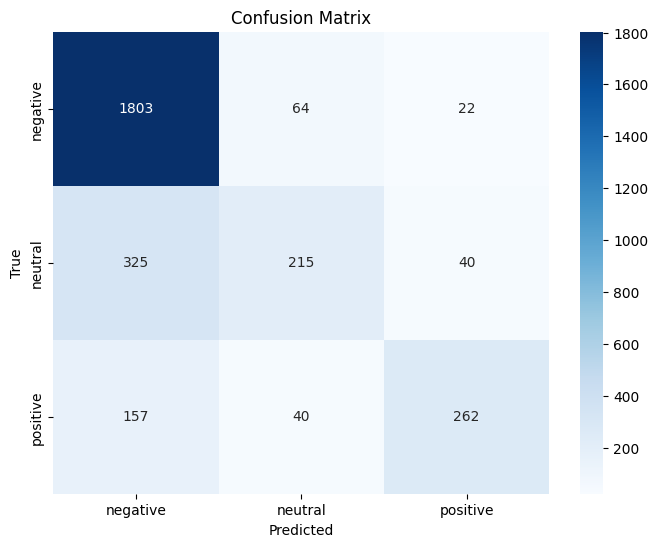


Classification Report:
              precision    recall  f1-score   support

    negative       0.79      0.95      0.86      1889
     neutral       0.67      0.37      0.48       580
    positive       0.81      0.57      0.67       459

    accuracy                           0.78      2928
   macro avg       0.76      0.63      0.67      2928
weighted avg       0.77      0.78      0.76      2928



In [23]:
# Display the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=naive_bayes_model.classes_, yticklabels=naive_bayes_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Display the classification report
print("\nClassification Report:")
print(classification_rep)


#SVM Model

In [27]:
# Train a Support Vector Machine (SVM) model
svm_model = SVC()
svm_model.fit(X_train_vectorized, y_train)

# Make predictions on the test set
predictions = svm_model.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

# Display the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.79

Confusion Matrix:
[[1745  106   38]
 [ 256  284   40]
 [ 111   65  283]]

Classification Report:
              precision    recall  f1-score   support

    negative       0.83      0.92      0.87      1889
     neutral       0.62      0.49      0.55       580
    positive       0.78      0.62      0.69       459

    accuracy                           0.79      2928
   macro avg       0.74      0.68      0.70      2928
weighted avg       0.78      0.79      0.78      2928



# **Include TF-IDF Vectorizer on SVM**

In [29]:
# Convert text data to numerical data using TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a Support Vector Machine (SVM) model using TF-IDF vectorizer
svm_model_tfidf = SVC()
svm_model_tfidf.fit(X_train_tfidf, y_train)

# Make predictions on the test set using TF-IDF vectorizer
predictions_tfidf = svm_model_tfidf.predict(X_test_tfidf)

# Evaluate the model using TF-IDF vectorizer
accuracy_tfidf = accuracy_score(y_test, predictions_tfidf)
conf_matrix_tfidf = confusion_matrix(y_test, predictions_tfidf)
classification_rep_tfidf = classification_report(y_test, predictions_tfidf)

# Display the evaluation metrics for TF-IDF vectorizer
print("\nTF-IDF Results:")
print(f"Accuracy: {accuracy_tfidf:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix_tfidf)
print("\nClassification Report:")
print(classification_rep_tfidf)


TF-IDF Results:
Accuracy: 0.80

Confusion Matrix:
[[1803   58   28]
 [ 306  239   35]
 [ 127   46  286]]

Classification Report:
              precision    recall  f1-score   support

    negative       0.81      0.95      0.87      1889
     neutral       0.70      0.41      0.52       580
    positive       0.82      0.62      0.71       459

    accuracy                           0.80      2928
   macro avg       0.77      0.66      0.70      2928
weighted avg       0.79      0.80      0.78      2928

